## Definition

* <b>Binary classification</b> is a type of supervised learning problem where the goal is to classify each input, choosing between two possible labels  or classes.
  * Example: Class 1 = Spam  |  Class 0 = Not Spam
* <b>Logistic regression</b> is a machine learning algorithm used to solve binary classification problems.
  * It outputs a probability between 0 and 1. A threshold (for example $>0.5$) is applies to classify the input into one of the two classes. 

## Logistic regression model

* The outpyt $y$ can take only a small handful of possible values i.e. several "classes" or "categories".
* Fits an an S-shaped curve $g(z)$ to the data, called sigmoid function or logistic regression function.
* The output of the sigmoid function is always between 0 and 1.
* $g(z)$ = <font size=4>$\frac{1}{1 + e^{-z}}$</font>, where <font size=2>$0<g(z)<1; e\approx2.7$</font>
* How to model $g(z)$ with  $f_{\vec{w},b}(\vec{x}) = \vec{w}.\vec{x} + b$ ?
* * Substitute $z$ in $g(z)$ with the same old $f_{\vec{w},b}(\vec{x})$, already familiar from regression problems.
* * Keep on modeling $f_{\vec{w},b}(\vec{x})$ with regression gradient descent and cost functions.
* * As a result, we can again take as input data the same set of features $\vec{x}$, but output a number between 0 and 1 for every $x$.
* Think of the output of the logistic regression as a "probability" for the label $y$ to be true or false (i.e. equal to 1 or 0), given a certain input of $x$.
* Example:
* * Let $\vec{x}$ be a feature vector denoting tumor size.
* * Let $y$ be a label (class) denoting malignancy: 1 if the tumor is malignant, and 0 if not.
* * When we get a prediction value of $y=0.7$ - it means 70% chance for $y$ to be "true" (i.e. equal to 1) and therfore for the tumor to be malignant.
* A valid notation for logistic regression is also: $f_{\vec{w},b}(\vec{x}) = P(y=1 \mid \vec{x};\vec{w},b)$, where $P(y=1) + P(y=0) = 1$
* * This litteraly means "probability that $y$ is 1, given input $\vec{x}$ and parameters $\vec{w},b$

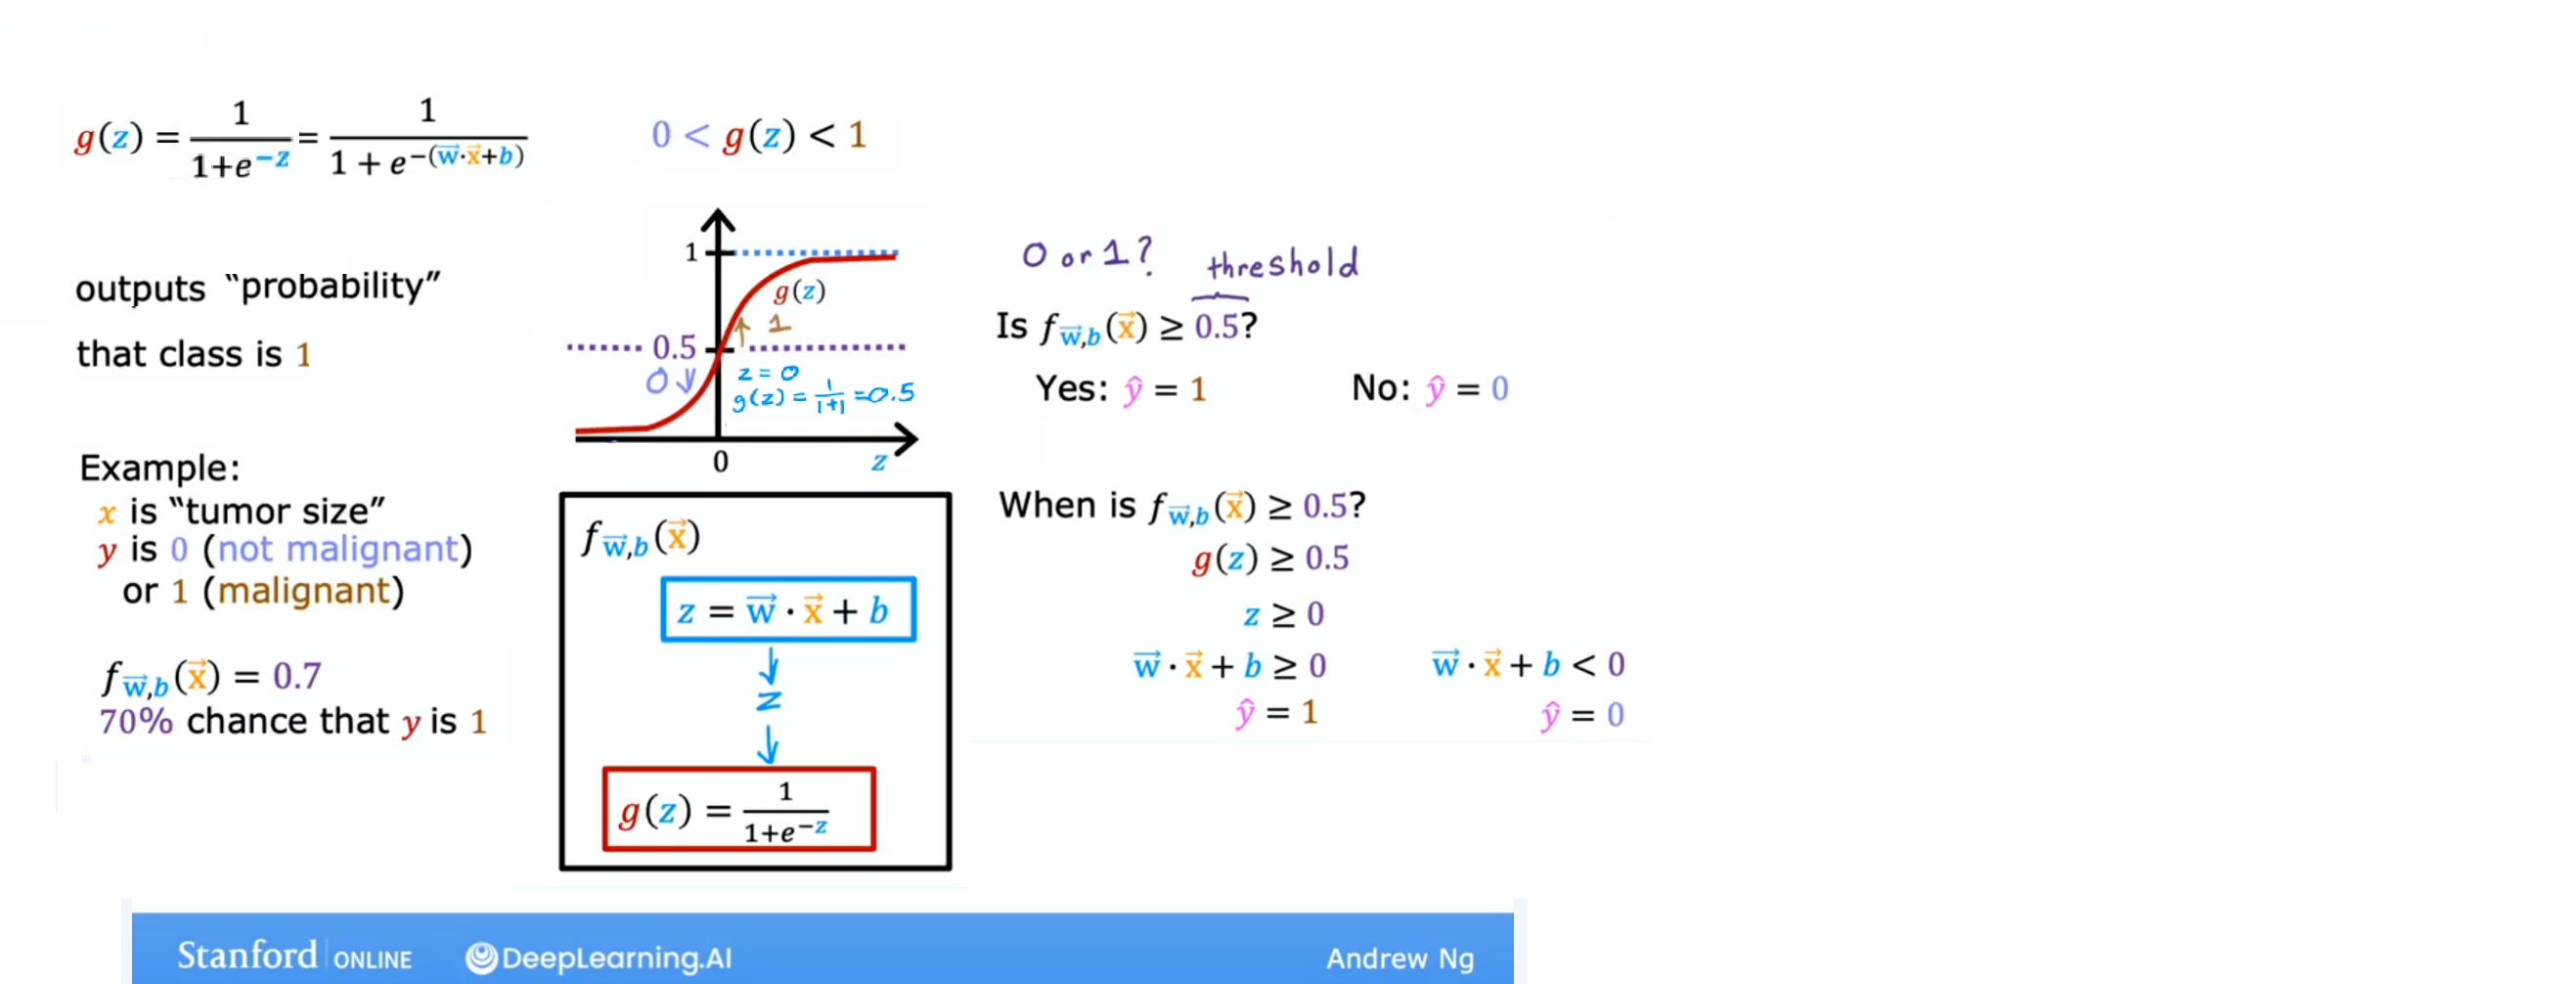


## Decision boundary of logistic regression

* The decision boundary is the line given by the equation: $z=\vec{w}.\vec{x}+b=0$
* The model predicts "true" when $\vec{w}.\vec{x}+b \geq 0$
* Example <b>I</b>:
* * $f_{\vec{w},b}(\vec{x}) = g(z) = g(w_1x_1 + w_2x_2 + b)$, where $\vec{w}=(1, 1), b=-3$
* * $z = \vec{w}.\vec{x}+b = x_1 + x_2 -3 = 0$
* * The decision boundry is given by the srtaight line $z: x_1+x_2=3$
<br>
* The decision boundary can also be different from a straight line.
* With a higher-order polynomial terms in $z$, the decision boundary can be a quite complex curve i.e. the logistic regression can fit pretty complex data.
* Example <b>II</b>:
* * $f_{\vec{w},b}(\vec{x}) = g(z) = g(w_1x_1^2 + w_2x_2^2 + b)$, where $\vec{w}=(1, 1), b=-1$
* * $z = \vec{w}.\vec{x}+b = x_1^2 + x_2^2 -1 = 0$
* * The decision boundry is given by the circle $z: x_1^2+x_2^2=1$

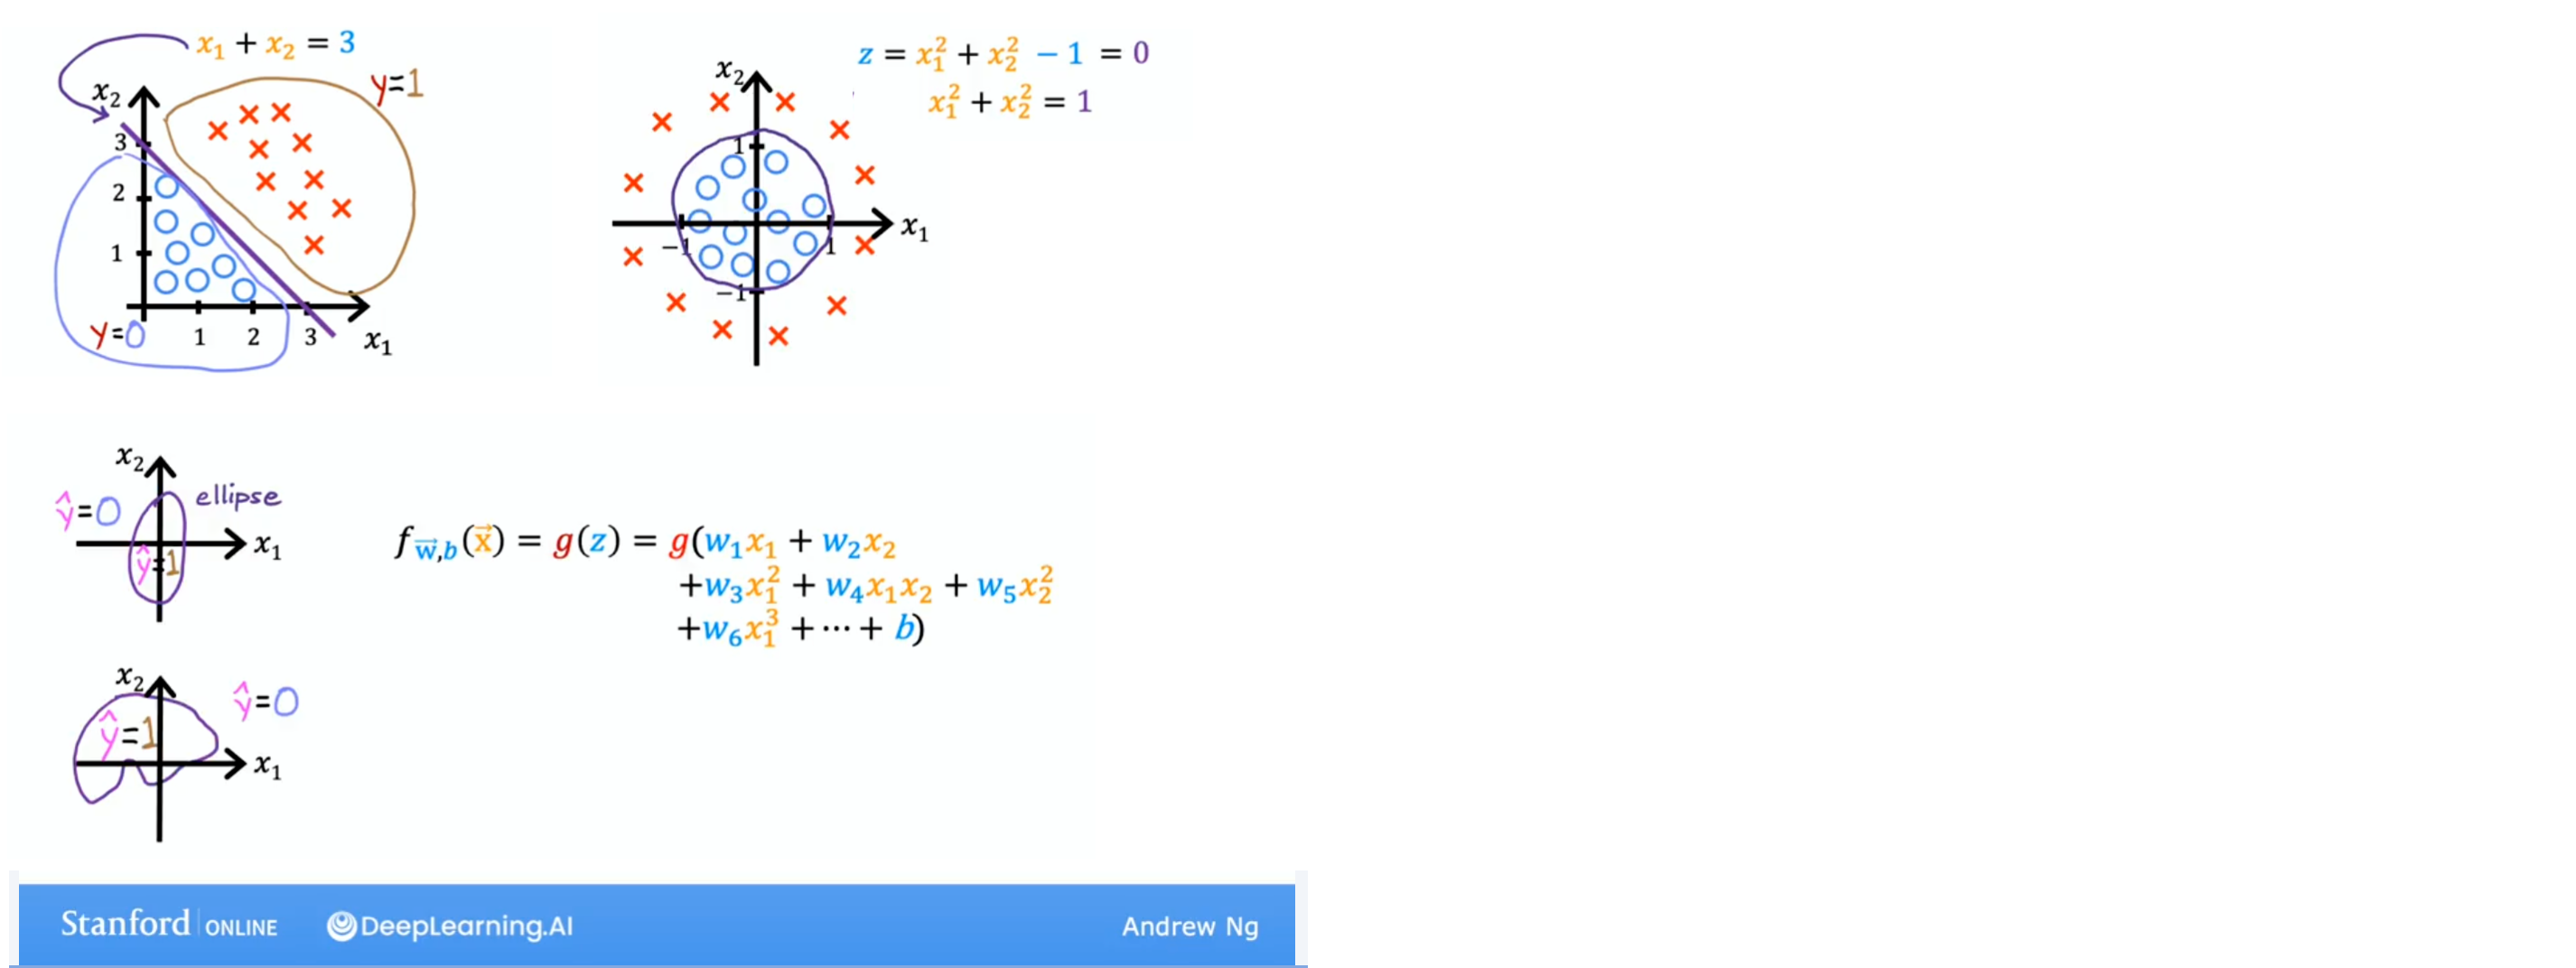

## Cost function for logistic regression

* Cost gives us a way to measure how specific parameters fit the training data and to choose better parameters.
* The squared error (or mean squared error) cost function is not ideal for logistic regression, as it produces a non-convex shape with lots of local minima, where Gradiesnt descent algorithm can get "stuck".
* Given by the formula: $L (f_{\vec{w},b}(\vec{x}) = \begin{cases} 
-\log (f_{\vec{w},b}(\vec{x}) \; \mid \; if \; y_i = 1 \\
-\log (1 - f_{\vec{w},b}(\vec{x}) \; \mid \; if \; y_i = 0 
\end{cases}$

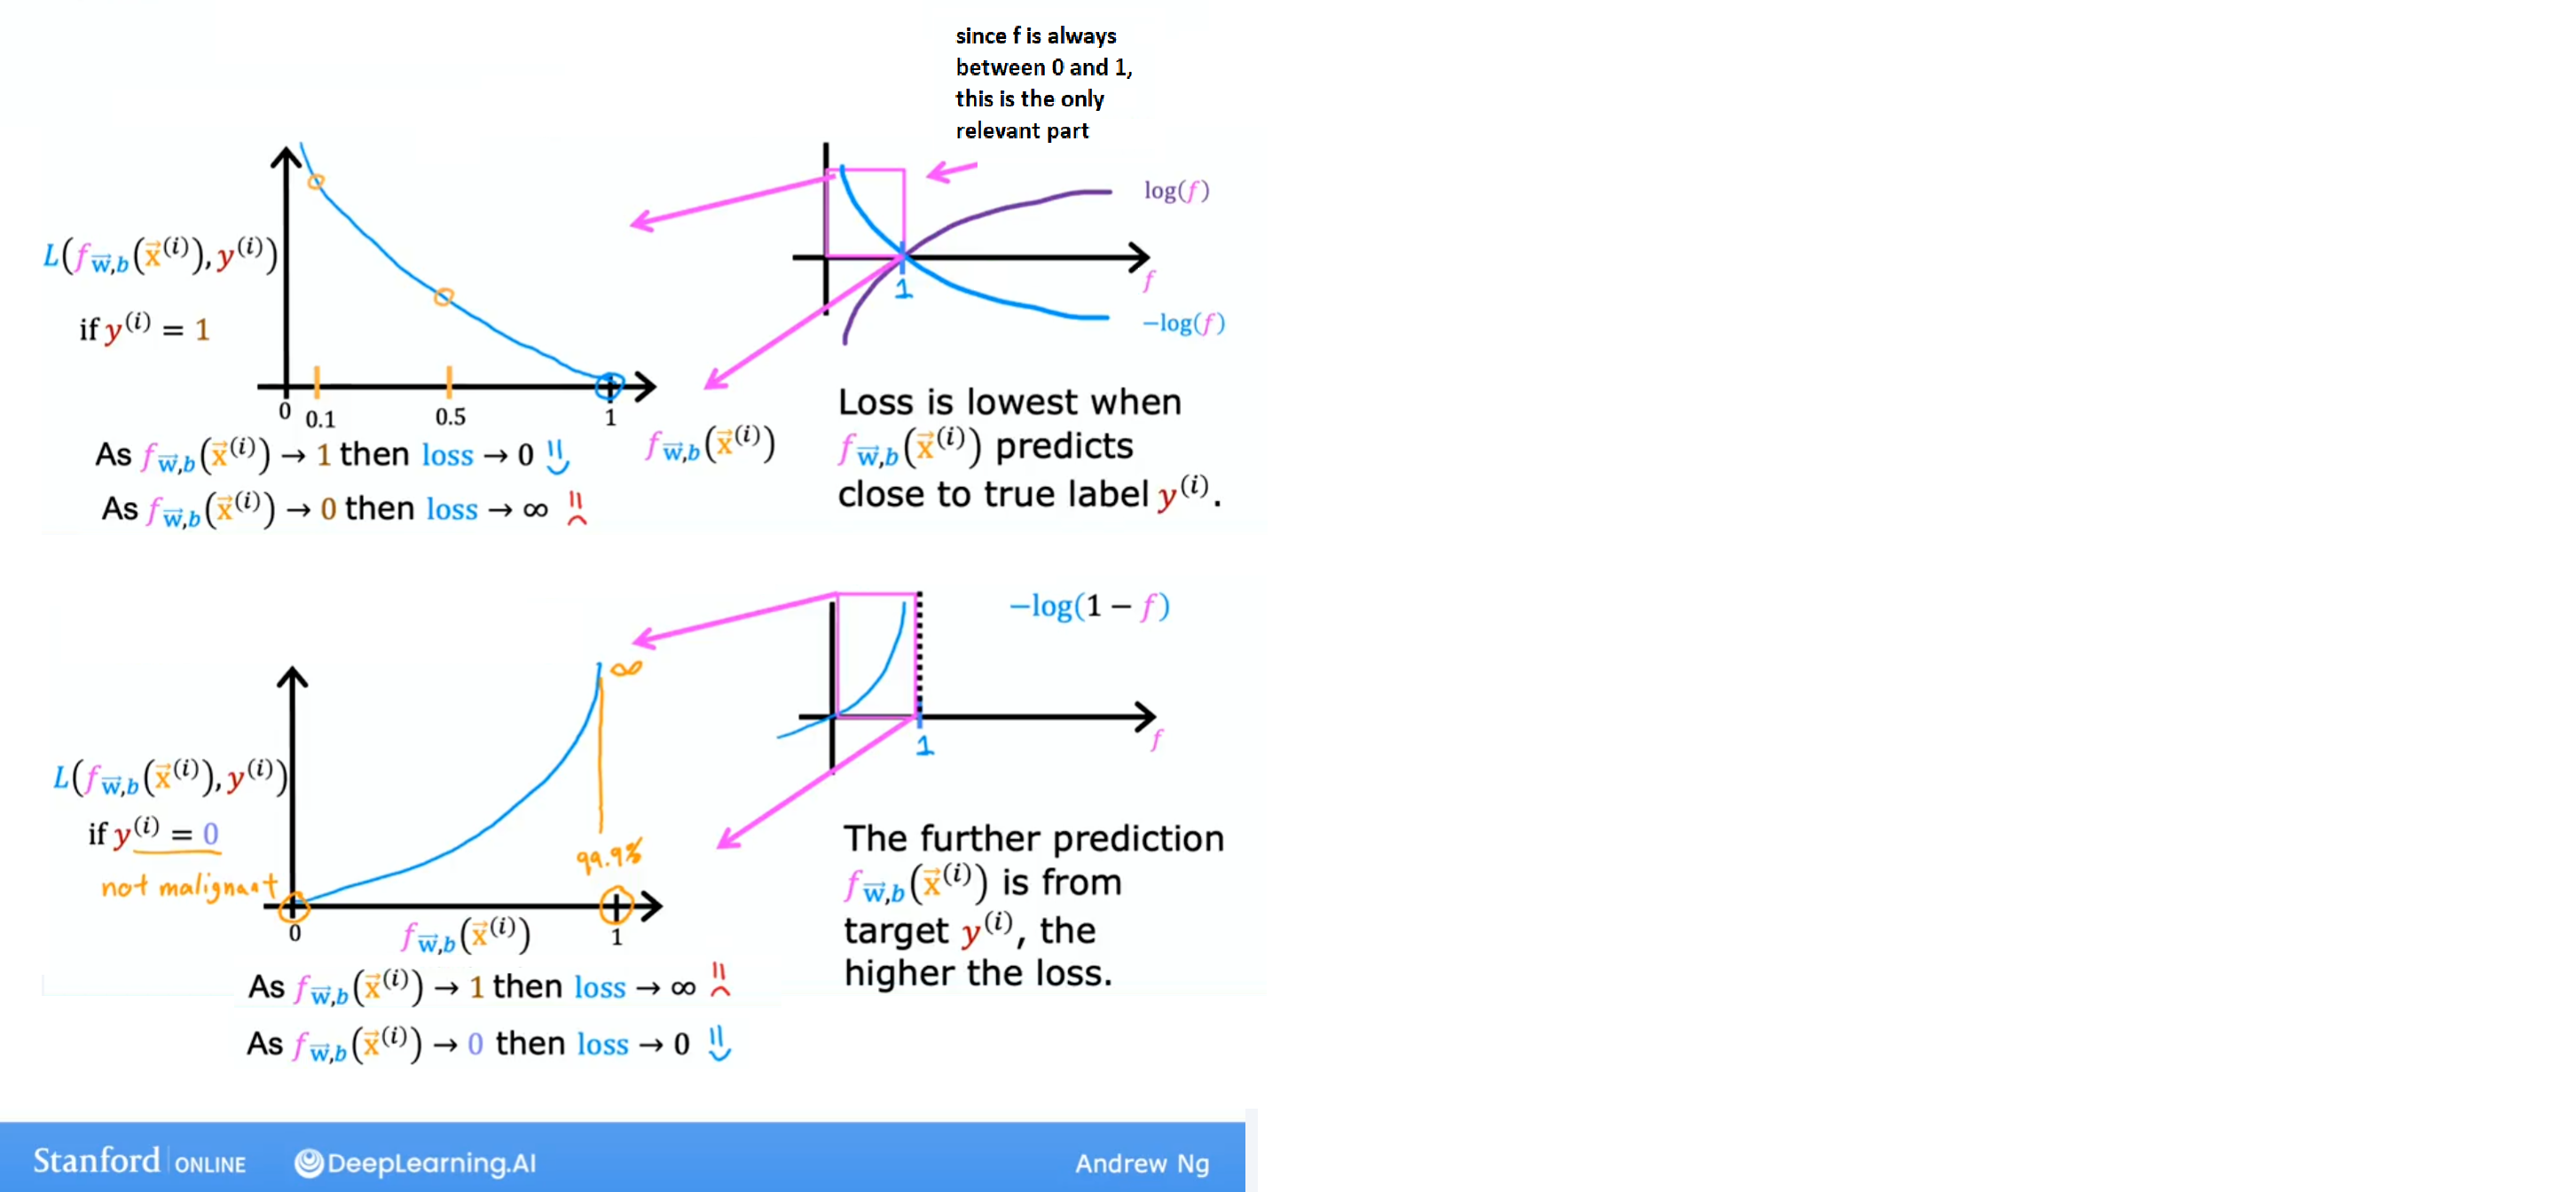

* Loss function measures how well you're doing on one training example and is by summing up the losses on all of the training examples that you then get, the cost function, which measures how well you're doing on the entire training set.
##### For $y_i = 1$:
* $\log(f)$ and $-\log(f)$ look the same, just flipped along the horizontal axis. Notice that $-\log(f)$ intersects the horizontal axis at $f=1$ and continues downward from there. Since $f$ is the output of logistic regression - it's always between 0 and 1 i.e. the only part of the function that's relevant is therefore the part between 0 and 1.
* If the algorithm predicts a probability close to 1 and the true label is 1, then the loss is very small because we are very close to the right answer. In contrast, if true label is 1 and the prediction is 0.5, the loss is a bit higher, and grows even higher if the algorithm outputs 0.1. Given the "tumor" classification example above, if the model thinks that there is only a 10% chance of the tumor being malignant, but y really is 1 (really is malignant) - then the loss is a much higher value.  Overall, the loss function incentivizes or nurtures, or helps push the algorithm to make more accurate predictions because the loss is lowest, when it predicts values close to the true label.
##### For $y_i = 0$:
* In this case, the loss is $-\log (1 - f)$ and again the range of $f$ is limited to 0 to 1 because logistic regression only outputs values between 0 and 1.
* When $f$ is 0 or very close to 0 and the true label is 0, the loss is also going to be very small - meaning that if the model's prediction is very close to 0, we nearly got it right. The larger the value of $f$ gets, the bigger the loss because the prediction is further from the true label 0. In fact, as that prediction approaches 1, the loss actually approaches infinity. Going back to the tumor classification example, if the model predicts that the patient's tumor is almost certain to be malignant, and it turns out to actually not be malignant, so $y$ equals 0 - then we penalize the model with a very high loss. The further the prediction f of x is away from the true value of y, the higher the loss. If $f$ approaches 0, the loss actually goes really large and in fact approaches infinity.  

## Gradient descent for logistic regression

It looks similar to linear regression, but with one significant difference:
* Linear regression: $f_{\vec{w},b}(\vec{x}) = \vec{w}.\vec{x} + b$
* Logistic regresion: $g(z) = f_{\vec{w},b}(\vec{x}) = $ <font size=4> $\frac{1}{1 + e^{-(\vec{w}.\vec{x} + b)}}$ </font>
<br><br>
#### Cost:
$ J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} ( y^{(i)}\log(f_{\vec{w},b}(\vec{x}^{(i)}) ) + ( 1-y^{(i)} ) ( 1 - \log(f_{\vec{w},b}(\vec{x}^{(i)}) ) $
<br><br>
#### Gradient descent:
<i>Repeat until convergence</i> {<br>
$ w_j = w_j - \alpha\frac{d}{dw} J(\vec{w},b) $ &emsp; for $j=1 ... n$ (# of features)
<br>
$ b = b - \alpha\frac{d}{db} J(\vec{w},b)  $
<br>} 
<br><i>where</i>:<br>
$\frac{\partial}{\partial w_{j}}J(\vec{w},b) = \frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{n} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} )x^{(i)}_{j}$ 
<br>$\frac{\partial}{\partial b}J(\vec{w},b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} )$
 


## Gradient descent for logistic regression with regularization

It again looks similar to linear regression, however in logistic regression  $f_{\vec{w},b}(x^{(i)}) = g(z)$
<br><br>
#### Cost: 
$J(\vec{w},b)= -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log{(f_{\vec{w},b}(x^{(i)})} + (1 - y^{(i)}) \log{(1 - f_{\vec{w},b}(x^{(i)})} ] + \frac{\lambda}{2m}\sum_{j=1}^{n}w_{j}^2$  
<br>
#### Gradient descent:
$ w_{j} = w_{j} - \alpha [ \frac{1}{m} \sum_{i,j=1}^{m,n} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} ) x^{i}_{j} $ + $ \frac{\lambda}{m}\sum_{j=1}^{n}w_{j} ]$
<br> 
$ b = b - \alpha [\frac{1}{m} \sum_{i=1}^{m} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} ) ]$
<br><br>
* $f_{\vec{w},b}(x^{(i)}) = g(z)$
* $n = $ length of feature vector 
* $m = $ number of training samples
* $x^{(i)} = (x^{(i)}_{1}, ... , x^{(i)}_{n}) = $ feature vector $i$
* $x^{(i)}_{j} = $ element $j$ in sample $i$
* $f_{\vec{w},b}(x^{(i)}) = w_{1}x_{1}$ + ... + $w_{n}x_{1}$ + $b$
* $y^{(i)}$ = output or predicted target variable $i$
* $(x^{(i)}, y^{(i)})$ = a single training example (the i-th training example) = a single row in a data table 